<a href="https://colab.research.google.com/github/Ch256981/IMLP347/blob/main/HW4_Ko_I_Hung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUDT 758J - HW4
## I-Hung Ko

In [2]:
# read Fashion MNist dataset
from tensorflow import keras

(data_train, out_train), (data_test, out_test) = keras.datasets.fashion_mnist.load_data()
data_train.shape, out_train.shape, data_test.shape, out_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocessing

In [3]:
# transformation
in_train = data_train / 255.0
in_test = data_test / 255.0
in_train.min(), in_train.max(), in_test.min(), in_test.max()

(0.0, 1.0, 0.0, 1.0)

In [4]:
# EDA on out
#out_train.min(), out_train.max(), out_test.min(), out_test.max()
import numpy as np
np.unique(out_train), np.unique(out_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [5]:
# enumerate out classes
class_names = {
0	: 'T-shirt/top',
1	: 'Trouser',
2 :	'Pullover',
3	: 'Dress',
4 :	'Coat',
5	: 'Sandal',
6	: 'Shirt',
7	: 'Sneaker',
8	: 'Bag',
9	: 'Ankle boot' }
print(class_names)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


## Training Set

In [15]:
# define function to display images
import math
import matplotlib.pyplot as plt

def plot(images, labels, predictions=None):
  num_rows = int(input('How many rows of training images (in 10 images per row) would you like to review?'))
  total_images = min(num_rows * 10, len(images))
  n_cols = 10
  n_rows = math.ceil(total_images / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2))
  if predictions is None:
    predictions = [None] * len(labels)
  axes = axes.flatten()
  for index in range(total_images):
     ax = axes[index]
     ax.imshow(images[index], cmap=plt.cm.binary)
     ax.set_xticks([])
     ax.set_yticks([])
     ax.set_title(class_names[labels[index]]) if class_names is not None else labels[index]
     if predictions[index] is not None:
       ax.set_xlabel(class_names[predictions[index]] if class_names is not None else predictions[index])

How many rows of training images (in 10 images per row) would you like to review?5


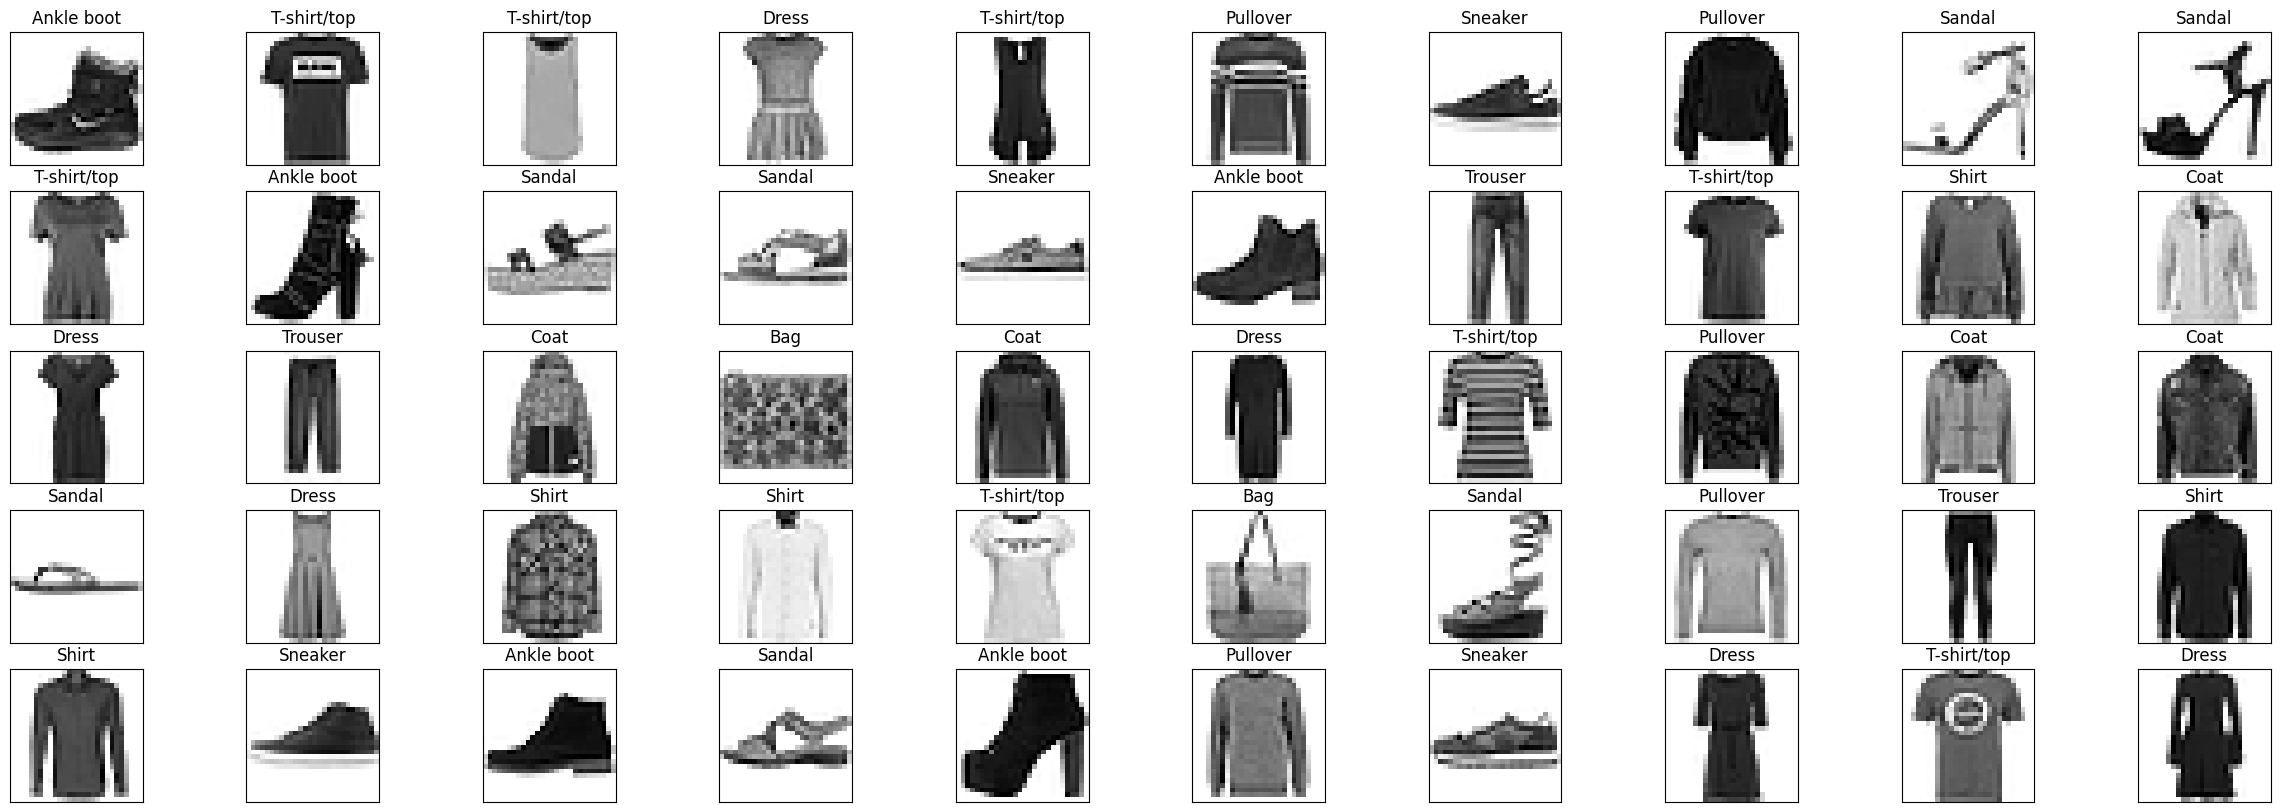

In [17]:
# display 10 * rows images in training set
plot(in_train, out_train)

## Model in Keras

In [27]:
model1 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model1.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history1 = model1.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 9s 11ms/step - loss: 0.5571 - accuracy: 0.8050 - val_loss: 0.4504 - val_accuracy: 0.8351
Epoch 2/2
800/800 [==============================] - 7s 9ms/step - loss: 0.4139 - accuracy: 0.8512 - val_loss: 0.4037 - val_accuracy: 0.8512


In [28]:
model2 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model2.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history2 = model2.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 7s 8ms/step - loss: 0.5655 - accuracy: 0.8062 - val_loss: 0.4602 - val_accuracy: 0.8300
Epoch 2/2
800/800 [==============================] - 5s 6ms/step - loss: 0.4138 - accuracy: 0.8512 - val_loss: 0.4043 - val_accuracy: 0.8518


In [29]:
model3 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model3.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history3 = model3.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 10s 12ms/step - loss: 0.5033 - accuracy: 0.8224 - val_loss: 0.4305 - val_accuracy: 0.8469
Epoch 2/2
800/800 [==============================] - 7s 9ms/step - loss: 0.3722 - accuracy: 0.8655 - val_loss: 0.3816 - val_accuracy: 0.8601


In [30]:
model4 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model4.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history4 = model4.fit(in_train, out_train, batch_size=88, epochs=5, validation_split=0.2)

Epoch 1/5
546/546 [==============================] - 8s 14ms/step - loss: 0.5803 - accuracy: 0.8024 - val_loss: 0.4483 - val_accuracy: 0.8371
Epoch 2/5
546/546 [==============================] - 6s 10ms/step - loss: 0.4256 - accuracy: 0.8478 - val_loss: 0.4047 - val_accuracy: 0.8550
Epoch 3/5
546/546 [==============================] - 7s 12ms/step - loss: 0.3879 - accuracy: 0.8602 - val_loss: 0.3800 - val_accuracy: 0.8635
Epoch 4/5
546/546 [==============================] - 6s 10ms/step - loss: 0.3588 - accuracy: 0.8716 - val_loss: 0.3855 - val_accuracy: 0.8589
Epoch 5/5
546/546 [==============================] - 7s 13ms/step - loss: 0.3397 - accuracy: 0.8773 - val_loss: 0.3550 - val_accuracy: 0.8682


In [31]:
model5 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model5.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history5 = model5.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.1)

Epoch 1/2
900/900 [==============================] - 9s 10ms/step - loss: 0.5443 - accuracy: 0.8098 - val_loss: 0.4440 - val_accuracy: 0.8332
Epoch 2/2
900/900 [==============================] - 9s 10ms/step - loss: 0.4073 - accuracy: 0.8547 - val_loss: 0.4033 - val_accuracy: 0.8500


## Test Set

In [32]:
val_accuracy1 = history1.history['val_accuracy']
val_accuracy2 = history2.history['val_accuracy']
val_accuracy3 = history3.history['val_accuracy']
val_accuracy4 = history4.history['val_accuracy']
val_accuracy5 = history5.history['val_accuracy']

val_accuracies = [
    history1.history['val_accuracy'][-1],
    history2.history['val_accuracy'][-1],
    history3.history['val_accuracy'][-1],
    history4.history['val_accuracy'][-1],
    history5.history['val_accuracy'][-1]
]

best_model_index = np.argmax(val_accuracies)

test_metrics = [model1, model2, model3, model4, model5][best_model_index].evaluate(in_test, out_test)

print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")


313/313 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.8623
Test Loss: 0.38279467821121216
Test Accuracy: 0.8622999787330627


## Application

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1,
                                   description='Image Index',
                                   layout=Layout(width='100%'))
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title(f'Label: {class_names[out_test[index]]}')
    ax1.xaxis.tick_top()
    ax1.set_xlabel(f'Predict: {class_names[preds[index]]}')
    ax1.set_ylabel('Pixel Location Index')
    ax1.set_xticks(range(28))
    ax1.set_yticks(range(28))
    ax1.tick_params(axis='x', labelrotation=90)
    bar = sns.barplot(y=[class_names[ind] for ind in range(10)],
                      x=probs[index]*100)
    bar.set_xlim(0, 100)
    bar.set_xlabel('Probability (%)')
    bar.set_ylabel('Prediction Label')
    bar.set_title('Prediction Probabilities')
    fig.tight_layout()
    plt.show()